In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# # Mount Google Drive to access files
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)
# # Create the Kaggle directory if it doesn't exist
# !mkdir -p ~/.kaggle
# # Copy the Kaggle API token from Google Drive to the Colab environment
# !cp "/content/drive/MyDrive/UNT/testproject" ~/.kaggle/
# # Set the appropriate permissions for the Kaggle API token
# !chmod 600 ~/.kaggle/kaggle.json
# # List the contents of the Kaggle directory to verify the file was copied
# !ls ~/.kaggle
# # Install the Kaggle library
# !pip install kaggle

Mounted at /content/drive
cp: -r not specified; omitting directory '/content/drive/MyDrive/UNT/testproject'
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
# # Set the Kaggle configuration directory to the specified path
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/UNT/testproject"

# # Download the specified dataset from Kaggle and save it to the specified path
# # !kaggle competitions download -c house-prices-advanced-regression-techniques
# # !ls

# # To unzip the ziped download file
# # !unzip house-prices-advanced-regression-techniques.zip -d /content/drive/MyDrive/UNT/testproject/

In [ ]:
# Read the CSV file "Amazon Sale Report.csv" located in the specified path and store it in a pandas DataFrame named df
house_price_train_df = pd.read_csv("/content/drive/MyDrive/UNT/testproject/train.csv")
house_price_test_df = pd.read_csv("/content/drive/MyDrive/UNT/testproject/test.csv")
house_price_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house_price_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

np.int64(259)

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


<Axes: >

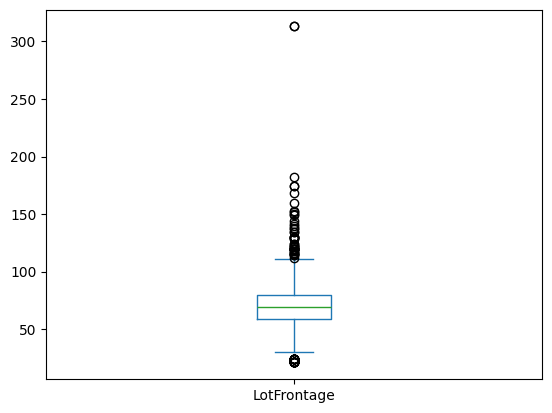

In [ ]:
house_price_train_df['LotFrontage'].isnull().sum()
house_price_train_df['LotFrontage'].describe()
house_price_train_df['LotFrontage'].plot(kind='box')

<Figure size 1000x500 with 0 Axes>

(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Box Plot of LotFrontage')

Text(0.5, 0, 'LotFrontage')

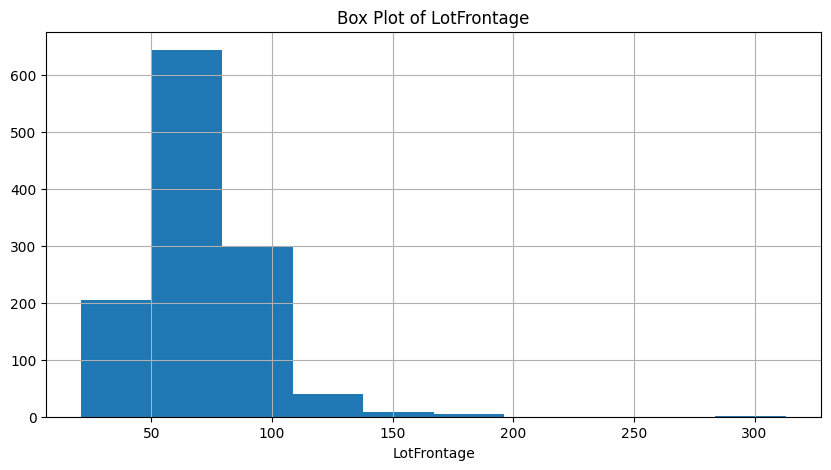

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(x=house_price_train_df['LotFrontage'])
plt.title('Box Plot of LotFrontage')
plt.xlabel('LotFrontage')
plt.grid(True)
plt.show()

LotFrontage: Linear feet of street connected to property

1. As the LotFrontage is Right-Skewed.
2. Mean > Median > Mode
3. The distribution seems to be concentrated on the range of roughly from 50-100 square feet.
4. we can see there are sum outliers which are influencing the mean.

np.int64(0)

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


<Axes: >

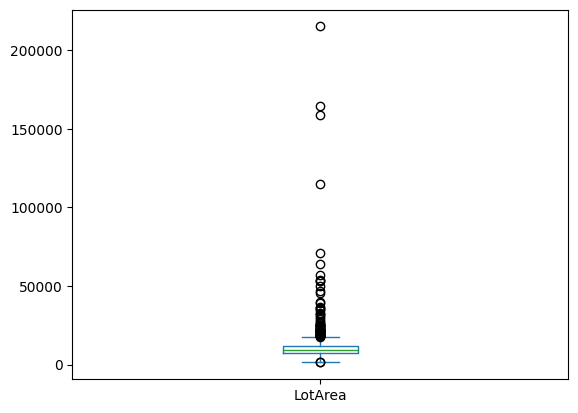

In [ ]:
house_price_train_df['LotArea'].isnull().sum()
house_price_train_df['LotArea'].describe()
house_price_train_df['LotArea'].plot(kind='box')

<Figure size 1000x500 with 0 Axes>

(array([1.423e+03, 2.400e+01, 8.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  1300. ,  22694.5,  44089. ,  65483.5,  86878. , 108272.5,
        129667. , 151061.5, 172456. , 193850.5, 215245. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Box Plot of LotArea')

Text(0.5, 0, 'LotArea')

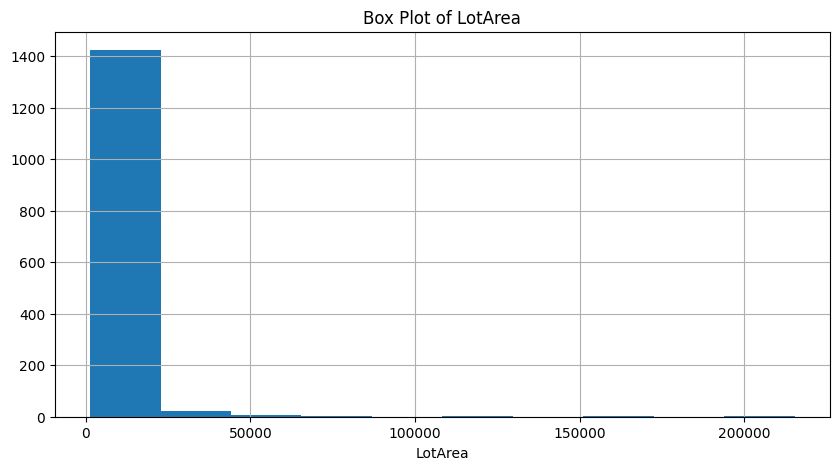

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(x=house_price_train_df['LotArea'],bins=10)
plt.title('Box Plot of LotArea')
plt.xlabel('LotArea')
plt.grid(True)
plt.show()

LotArea: Lot size in square feet

1. The majority of LotArea values are clustered on the lower end (left side), indicating a right-skewed distribution with a few extremely large values.
2. Mean > Median > Mode
3. Most of the LotArea values seem to be concentrated on the lower end of the scale, likely between 0 and 10,000 square feet
4. There are some properties with very high LotArea values (above 50,000), which might be affecting the distribution (or influencing the mean).


np.int64(8)

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


<ipython-input-84-7b8d7f6ed612>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_price_train_df['MasVnrArea'].fillna(0.0, inplace=True)


<Axes: >

np.int64(0)

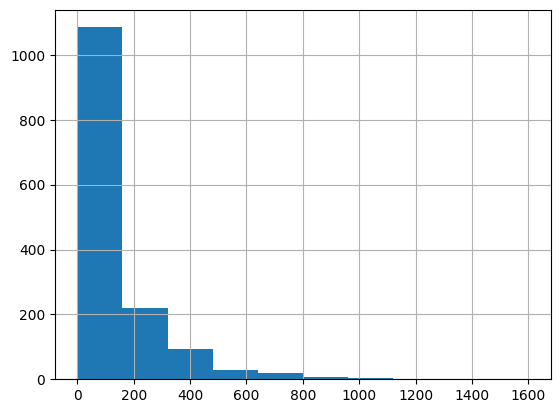

In [ ]:
house_price_train_df['MasVnrArea'].isnull().sum()
house_price_train_df['MasVnrArea'].describe()

# fill the null values with 0.0
house_price_train_df['MasVnrArea'].fillna(0.0, inplace=True)

house_price_train_df['MasVnrArea'].hist()
house_price_train_df['MasVnrArea'].isnull().sum()


<Axes: >

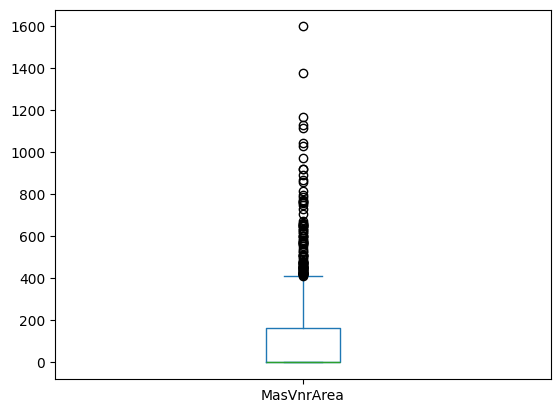

In [ ]:
house_price_train_df['MasVnrArea'].plot(kind='box')

MasVnrArea: Masonry veneer area in square feet

Analysis of MasVnrArea:

**Histogram**
1. The MasVnrArea (Masonry Veneer Area) is highly skewed, with most values concentrated near 0.
2. A large number of houses have no masonry veneer, which is why the count is high at 0 sq ft.
3. Only a small proportion of homes have values above 200 sq ft.
**Box Plot**
1. The median (50th percentile) is 0, confirming that most houses doesnot have veneer.
2. 75th percentile is 166, meaning only 25% of homes have a veneer area above 166 sq ft.
There are many outliers beyond 400 sq ft, with extreme values reaching 1600 sq ft.
**Conclusion:**
1. Most values are 0, indicating that masonry veneer is not present in the majority of houses.
2. A few homes have significantly large veneer areas, making the distribution highly skewed.
3. Cosidering transforming the data (e.g., log transformation) before fitting into the model.

np.int64(0)

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


<Axes: >

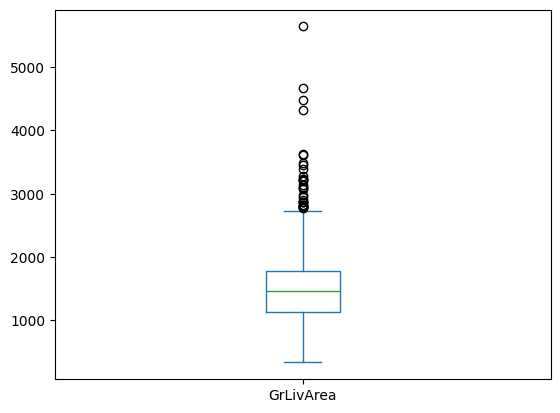

In [ ]:
house_price_train_df['GrLivArea'].isnull().sum()
house_price_train_df['GrLivArea'].describe()
house_price_train_df['GrLivArea'].plot(kind='box')

<Axes: >

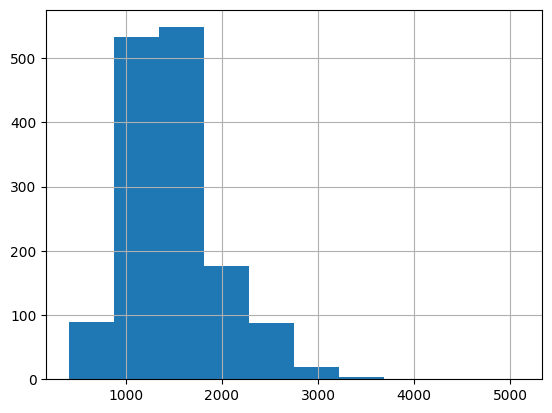

In [ ]:
house_price_test_df['GrLivArea'].hist()

np.int64(0)

,GarageArea
count,1460.000000
mean,472.980137
std,213.804841
min,0.000000
25%,334.500000
50%,480.000000
75%,576.000000
max,1418.000000


<Axes: >

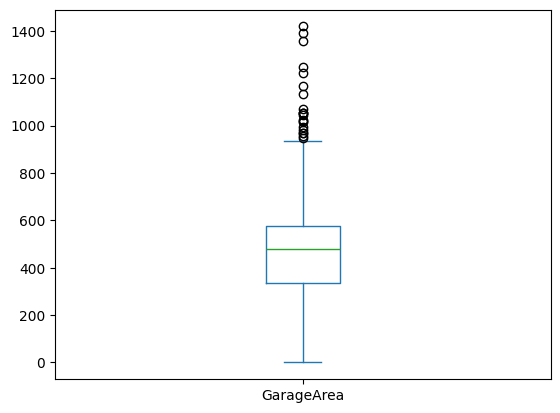

In [ ]:
house_price_train_df['GarageArea'].isnull().sum()
house_price_train_df['GarageArea'].describe()
house_price_train_df['GarageArea'].plot(kind='box')

np.int64(0)

,TotalBsmtSF
count,1460.000000
mean,1057.429452
std,438.705324
min,0.000000
25%,795.750000
50%,991.500000
75%,1298.250000
max,6110.000000


<Axes: >

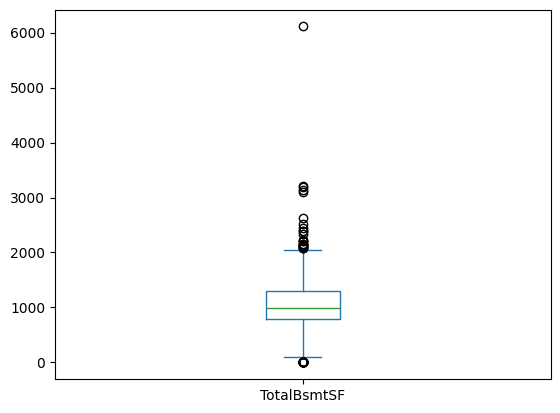

In [ ]:
house_price_train_df['TotalBsmtSF'].isnull().sum()
house_price_train_df['TotalBsmtSF'].describe()
house_price_train_df['TotalBsmtSF'].plot(kind='box')

np.int64(0)

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<Axes: >

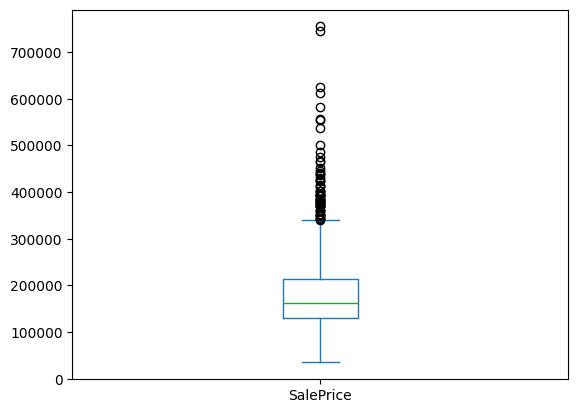

In [ ]:
house_price_train_df['SalePrice'].isnull().sum()
house_price_train_df['SalePrice'].describe()
house_price_train_df['SalePrice'].plot(kind='box')

<Axes: >

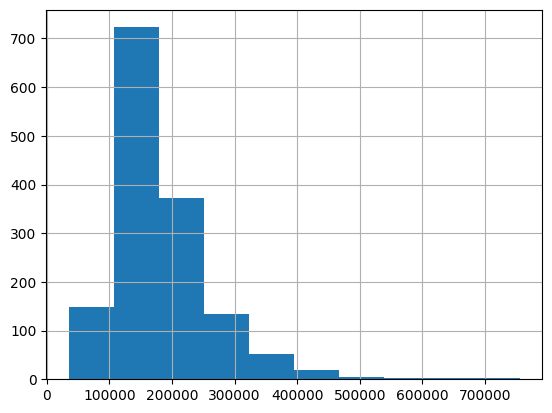

In [ ]:
house_price_train_df['SalePrice'].hist()

In [ ]:
# Example encoding for Ames Housing Dataset
ordinal_mappings = {
    'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'ExterCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'FireplaceQu': {'Ex': 5, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
}

for var, mapping in ordinal_mappings.items():
    house_price_train_df[var + '_score'] = house_price_train_df[var].map(mapping)

<Figure size 800x600 with 0 Axes>

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (np.float64(74160.16474519414),
  np.float64(180921.19589041095),
  np.float64(0.9319665641512983)))

Text(0.5, 1.0, 'Q-Q Plot of SalePrice vs. Normal Distribution')

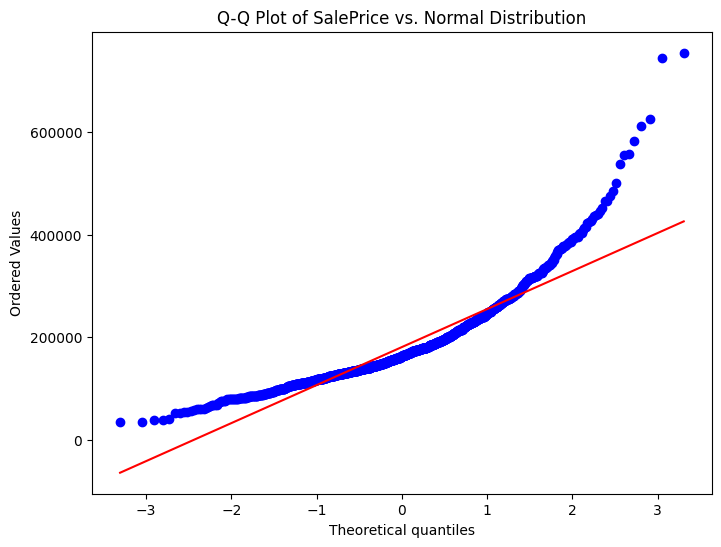

SalePrice Descriptive Statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [ ]:
#1.What is the distribution of sale prices, and how does it deviate from normality?

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(house_price_train_df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot of SalePrice vs. Normal Distribution')
plt.show()
print("SalePrice Descriptive Statistics:")
print(house_price_train_df['SalePrice'].describe())
print("\nSkewness:", house_price_train_df['SalePrice'].skew())
print("Kurtosis:", house_price_train_df['SalePrice'].kurt())

<Figure size 800x600 with 0 Axes>

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (np.float64(0.398259646654151),
  np.float64(12.024057394918403),
  np.float64(0.9953761551826702)))

Text(0.5, 1.0, 'Q-Q Plot of SalePrice vs. Normal Distribution')

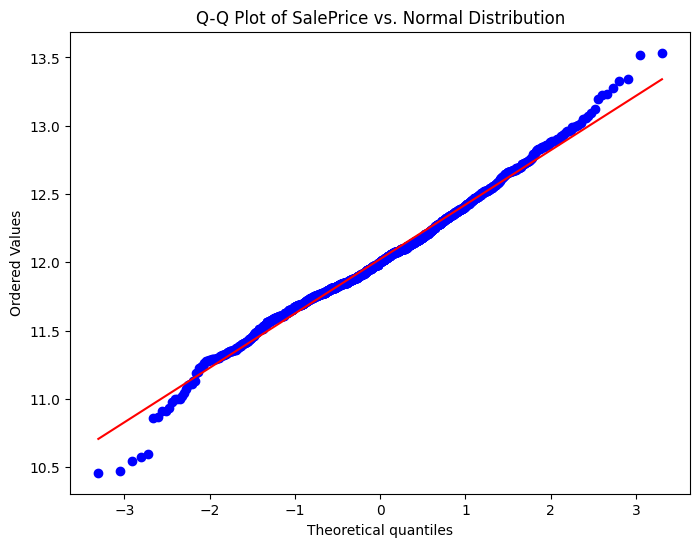

SalePrice Descriptive Statistics:
count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice_log, dtype: float64

Skewness: 0.12134661989685333
Kurtosis: 0.809519155707878


In [ ]:
#log_transformation
house_price_train_df['SalePrice_log'] = np.log1p(house_price_train_df['SalePrice'])
plt.figure(figsize=(8, 6))
stats.probplot(house_price_train_df['SalePrice_log'], dist="norm", plot=plt)
plt.title('Q-Q Plot of SalePrice vs. Normal Distribution')
plt.show()
print("SalePrice Descriptive Statistics:")
print(house_price_train_df['SalePrice_log'].describe())
print("\nSkewness:", house_price_train_df['SalePrice_log'].skew())
print("Kurtosis:", house_price_train_df['SalePrice_log'].kurt())

In [ ]:
# house_price_train_df['BsmtFinSF1'].hist()
# house_price_train_df['BsmtFinSF2'].hist()
# house_price_train_df['BsmtUnfSF'].hist()
# house_price_train_df['TotalBsmtSF'].hist()
# house_price_train_df['1stFlrSF'].hist()
# house_price_train_df['2ndFlrSF'].hist()
# house_price_train_df['LowQualFinSF'].hist()
# house_price_train_df['GarageArea'].hist()
# house_price_train_df['WoodDeckSF'].hist()
# house_price_train_df['OpenPorchSF'].hist()
# house_price_train_df['EnclosedPorch'].hist()
# house_price_train_df['3SsnPorch'].hist()
# house_price_train_df['ScreenPorch'].hist()
# house_price_train_df['PoolArea'].hist()

In [ ]:
# 2. Calculate average and median SalePrice (or SalePrice_log) by Neighborhood
neighborhood_prices = house_price_train_df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

# Set a minimum sales threshold
min_sales = 10

# Filter neighborhoods with fewer than min_sales sales
reliable_neighborhoods = neighborhood_prices[neighborhood_prices['count'] >= min_sales]

print("\nReliable Neighborhoods (at least {} sales):".format(min_sales))
print(reliable_neighborhoods.sort_values(by='mean'))


Reliable Neighborhoods (at least 10 sales):
                       mean    median  count
Neighborhood                                
MeadowV        98576.470588   88000.0     17
IDOTRR        100123.783784  103000.0     37
BrDale        104493.750000  106000.0     16
BrkSide       124834.051724  124300.0     58
Edwards       128219.700000  121750.0    100
OldTown       128225.300885  119000.0    113
Sawyer        136793.135135  135000.0     74
SWISU         142591.360000  139500.0     25
NAmes         145847.080000  140000.0    225
Mitchel       156270.122449  153500.0     49
SawyerW       186555.796610  179900.0     59
NWAmes        189050.068493  182900.0     73
Gilbert       192854.506329  181000.0     79
Blmngtn       194870.882353  191000.0     17
CollgCr       197965.773333  197200.0    150
Crawfor       210624.725490  200624.0     51
ClearCr       212565.428571  200250.0     28
Somerst       225379.837209  225500.0     86
Veenker       238772.727273  218000.0     11
Timber    

<Figure size 4000x1000 with 0 Axes>

<BarContainer object of 23 artists>

Text(0.5, 0, 'Neighborhood')

Text(0, 0.5, 'Average Sale Price')

Text(0.5, 1.0, 'Average Sale Price by Reliable Neighborhood')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'NoRidge'),
  Text(1, 0, 'NridgHt'),
  Text(2, 0, 'StoneBr'),
  Text(3, 0, 'Timber'),
  Text(4, 0, 'Veenker'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'ClearCr'),
  Text(7, 0, 'Crawfor'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Blmngtn'),
  Text(10, 0, 'Gilbert'),
  Text(11, 0, 'NWAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'Mitchel'),
  Text(14, 0, 'NAmes'),
  Text(15, 0, 'SWISU'),
  Text(16, 0, 'Sawyer'),
  Text(17, 0, 'OldTown'),
  Text(18, 0, 'Edwards'),
  Text(19, 0, 'BrkSide'),
  Text(20, 0, 'BrDale'),
  Text(21, 0, 'IDOTRR'),
  Text(22, 0, 'MeadowV')])

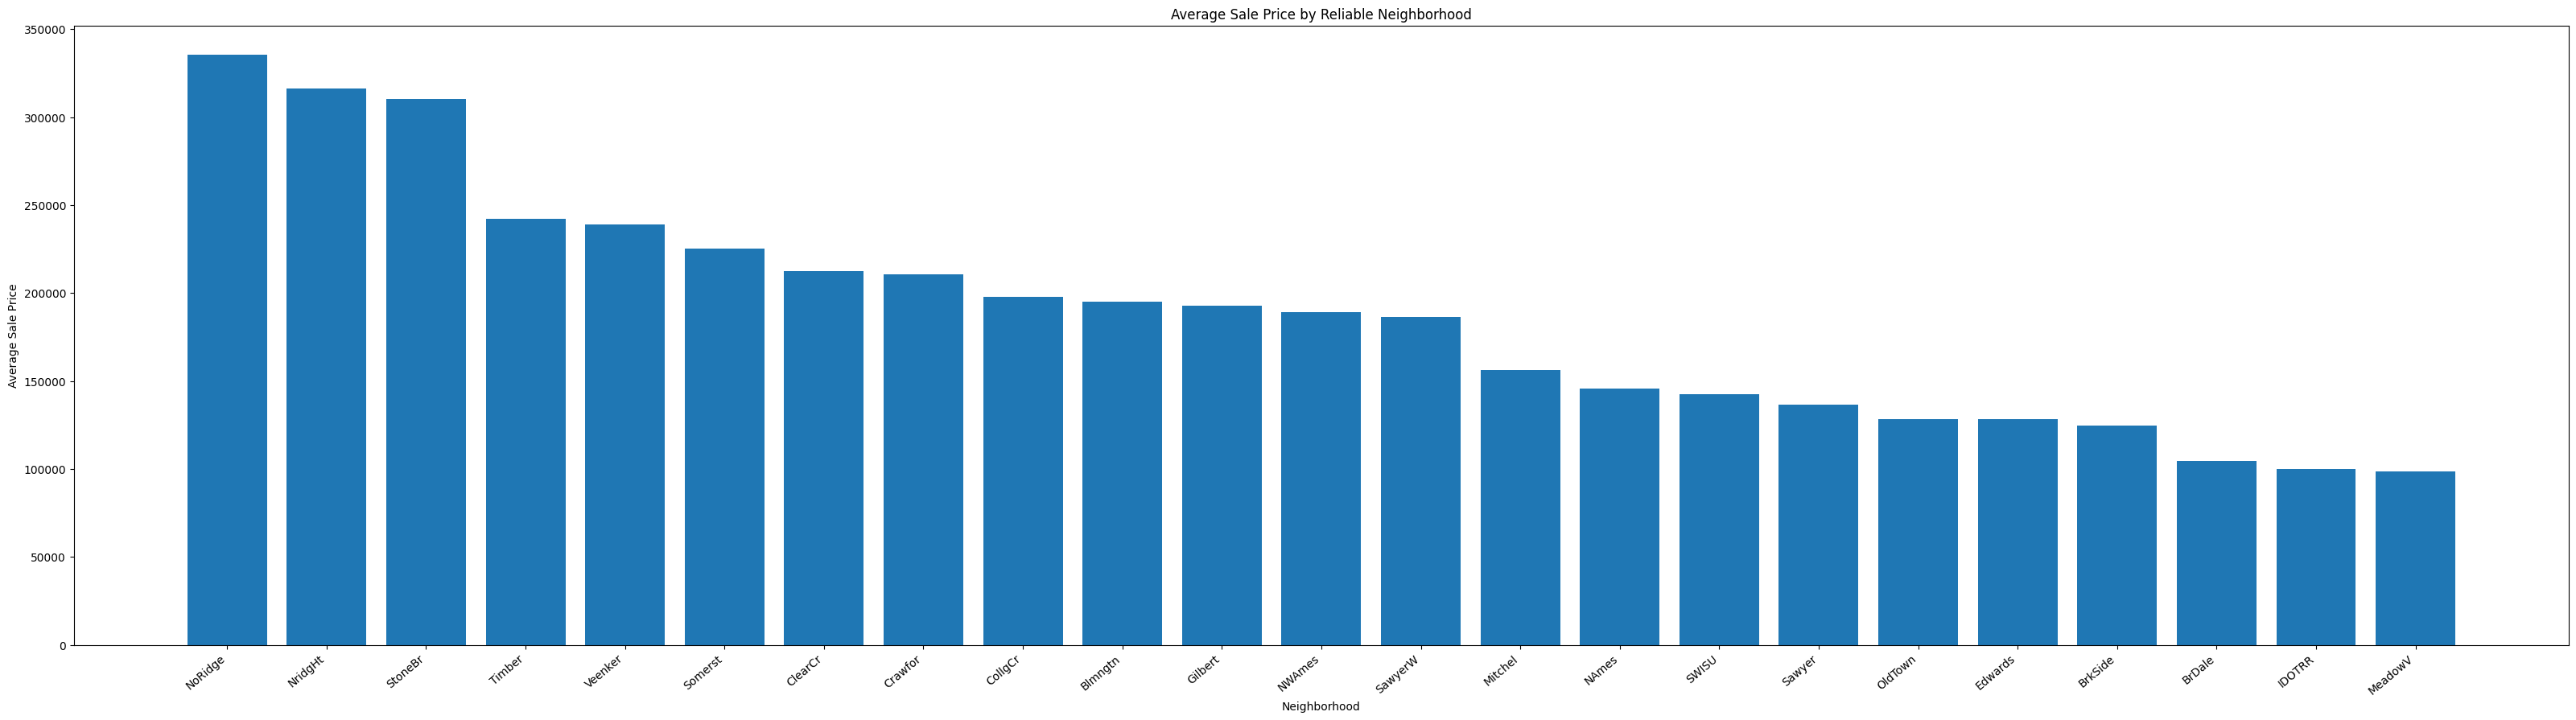

In [ ]:
# Plotting the reliable neighborhoods
plt.figure(figsize=(40, 10))
plt.bar(reliable_neighborhoods.index, reliable_neighborhoods['mean'])
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price by Reliable Neighborhood")
plt.xticks(rotation=40, ha="right")
plt.show()

In [ ]:
# Get the list of all neighborhoods
all_neighborhoods = house_price_train_df['Neighborhood'].unique()

# Perform ANOVA test
fvalue, pvalue = stats.f_oneway(*(house_price_train_df['SalePrice'][house_price_train_df['Neighborhood'] == neighborhood] for neighborhood in all_neighborhoods))

print("ANOVA F-value:", fvalue)
print("ANOVA p-value:", pvalue)

# Interpret the p-value
alpha = 0.05  # Significance level
if pvalue < alpha:
    print("The average prices among neighborhoods are significantly different.")
else:
    print("There is no significant difference in average prices among neighborhoods.")

ANOVA F-value: 71.78486512058272
ANOVA p-value: 1.558600282771154e-225
The average prices among neighborhoods are significantly different.


In [ ]:
# Grouping data by Neighborhood and Year Sold
avg_prices_by_year = house_price_train_df.groupby(['Neighborhood', 'YrSold'])['SalePrice'].mean().reset_index()

# Renaming columns for clarity
avg_prices_by_year.rename(columns={'SalePrice': 'AvgSalePrice'}, inplace=True)

# Display the first few rows
print(avg_prices_by_year.head(20))

   Neighborhood  YrSold   AvgSalePrice
0       Blmngtn    2006  217087.000000
1       Blmngtn    2007  183350.500000
2       Blmngtn    2008  175447.500000
3       Blmngtn    2009  176720.000000
4       Blmngtn    2010  192000.000000
5       Blueste    2008  151000.000000
6       Blueste    2009  124000.000000
7        BrDale    2006   96750.000000
8        BrDale    2007  113833.333333
9        BrDale    2008   95225.000000
10       BrDale    2009  118625.000000
11       BrDale    2010   88000.000000
12      BrkSide    2006  112746.666667
13      BrkSide    2007  135737.500000
14      BrkSide    2008  121707.142857
15      BrkSide    2009  134994.117647
16      BrkSide    2010   96500.000000
17      ClearCr    2006  199166.666667
18      ClearCr    2007  236333.333333
19      ClearCr    2008  208991.500000


SalePrice            1.000000
OverallQual          0.809829
ExterQual_score      0.684014
KitchenQual_score    0.672849
Name: SalePrice, dtype: float64


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice Distribution by OverallQual')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

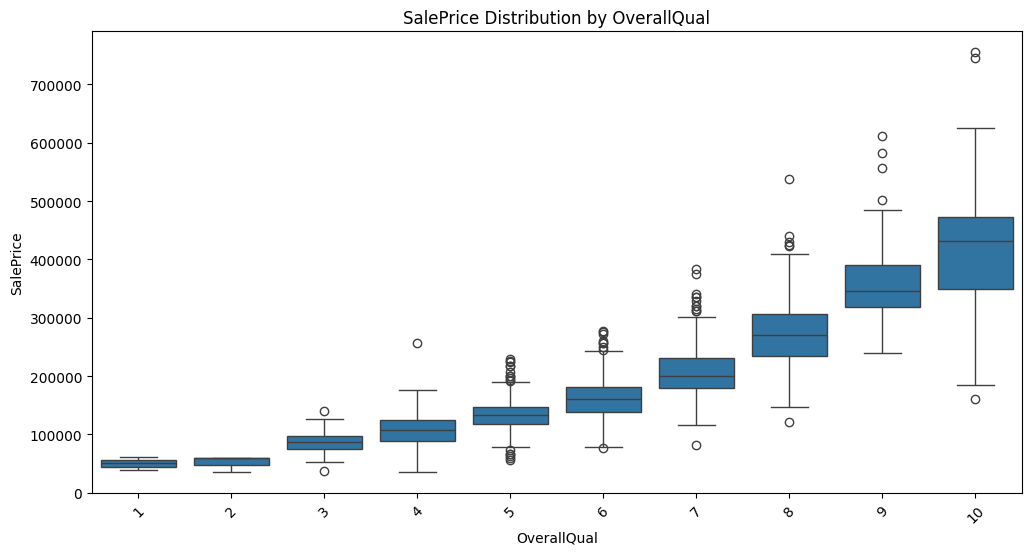

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='ExterQual_score', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice Distribution by ExterQual')

([0, 1, 2, 3],
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

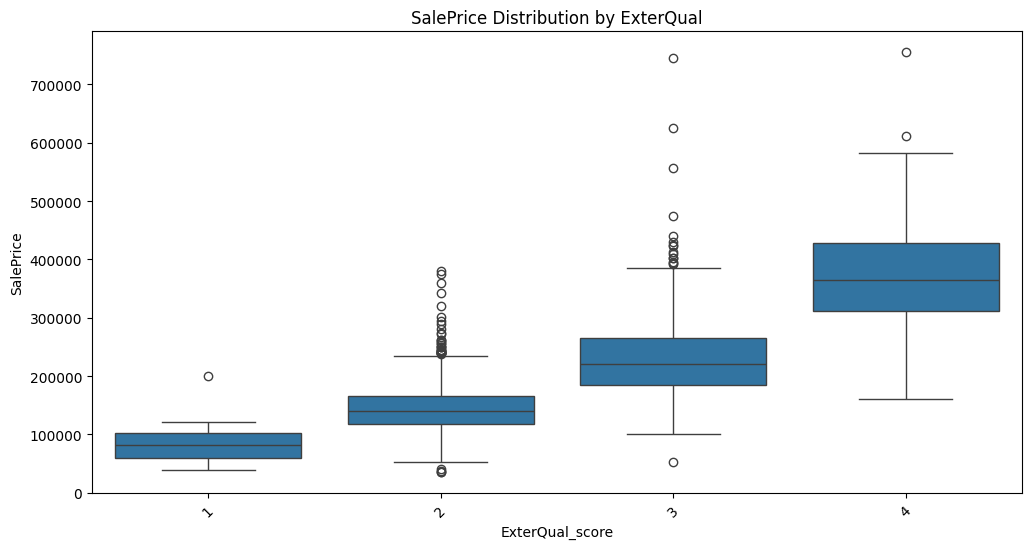

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='KitchenQual_score', ylabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice Distribution by KitchenQual')

([0, 1, 2, 3],
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

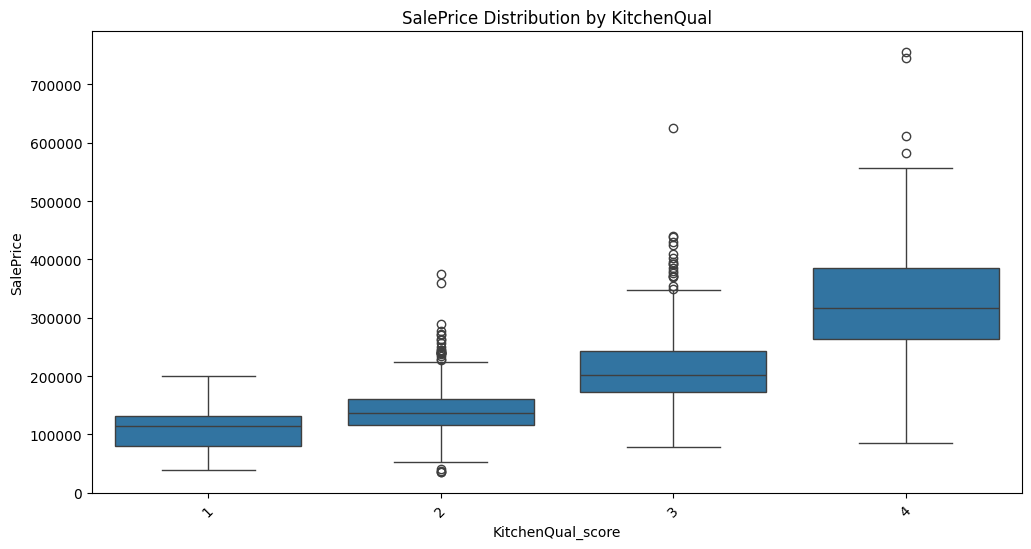

In [ ]:
#3.How do ordinal quality ratings (e.g., OverallQual, ExterQual, KitchenQual) impact SalePrice?
correlation_matrix = house_price_train_df[['OverallQual','ExterQual_score', 'KitchenQual_score','SalePrice']].corr(method='spearman')
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

# Example for OverallQual
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=house_price_train_df, order=sorted(house_price_train_df['OverallQual'].unique()))
plt.title('SalePrice Distribution by OverallQual')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='ExterQual_score', y='SalePrice', data=house_price_train_df, order=sorted(house_price_train_df['ExterQual_score'].unique()))
plt.title('SalePrice Distribution by ExterQual')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='KitchenQual_score', y='SalePrice', data=house_price_train_df, order=sorted(house_price_train_df['KitchenQual_score'].unique()))
plt.title('SalePrice Distribution by KitchenQual')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='TotalSF', ylabel='SalePrice'>

Text(0.5, 1.0, 'Relationship between Total Square Feet and Sale Price')

Text(0.5, 0, 'Total Square Feet (GrLivArea + TotalBsmtSF + GarageArea)')

Text(0, 0.5, 'Sale Price')

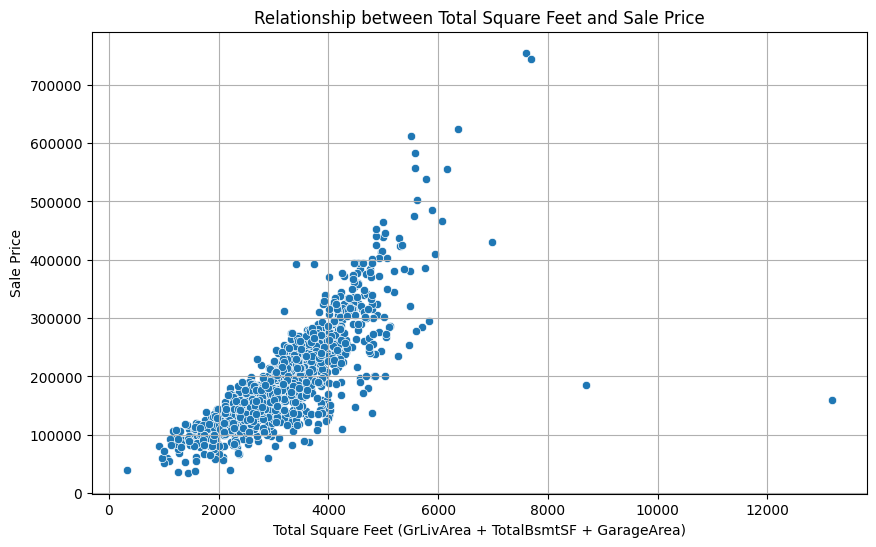

Correlation between TotalSF and SalePrice: 0.8075184760515015


In [ ]:
# Create a new feature 'TotalSF' representing the total square footage
house_price_train_df['TotalSF'] = house_price_train_df['GrLivArea'] + house_price_train_df['TotalBsmtSF'] + house_price_train_df['GarageArea']

# Scatter plot to visualize the relationship between TotalSF and SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSF', y='SalePrice', data=house_price_train_df)
plt.title('Relationship between Total Square Feet and Sale Price')
plt.xlabel('Total Square Feet (GrLivArea + TotalBsmtSF + GarageArea)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = house_price_train_df['TotalSF'].corr(house_price_train_df['SalePrice'])
print(f"Correlation between TotalSF and SalePrice: {correlation}")


In [ ]:
correlation_matrix = house_price_train_df[['OverallQual','OverallCond','BsmtQual_score', 'ExterCond_score', 'KitchenQual_score', 'ExterQual_score','BsmtCond_score','BsmtExposure_score',
                                           'HeatingQC_score','FireplaceQu_score','GarageQual_score','GarageCond_score','PoolQC_score','BsmtFinType1_score','BsmtFinType2_score',
                                           'SalePrice']].corr(method='spearman')
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

SalePrice             1.000000
OverallQual           0.809829
ExterQual_score       0.684014
KitchenQual_score     0.672849
BsmtQual_score        0.664393
HeatingQC_score       0.491392
BsmtFinType1_score    0.325257
BsmtExposure_score    0.304819
PoolQC_score          0.283473
FireplaceQu_score     0.241431
GarageQual_score      0.197412
BsmtCond_score        0.196402
GarageCond_score      0.171190
ExterCond_score       0.011682
BsmtFinType2_score   -0.056752
OverallCond          -0.129325
Name: SalePrice, dtype: float64


<Figure size 5000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

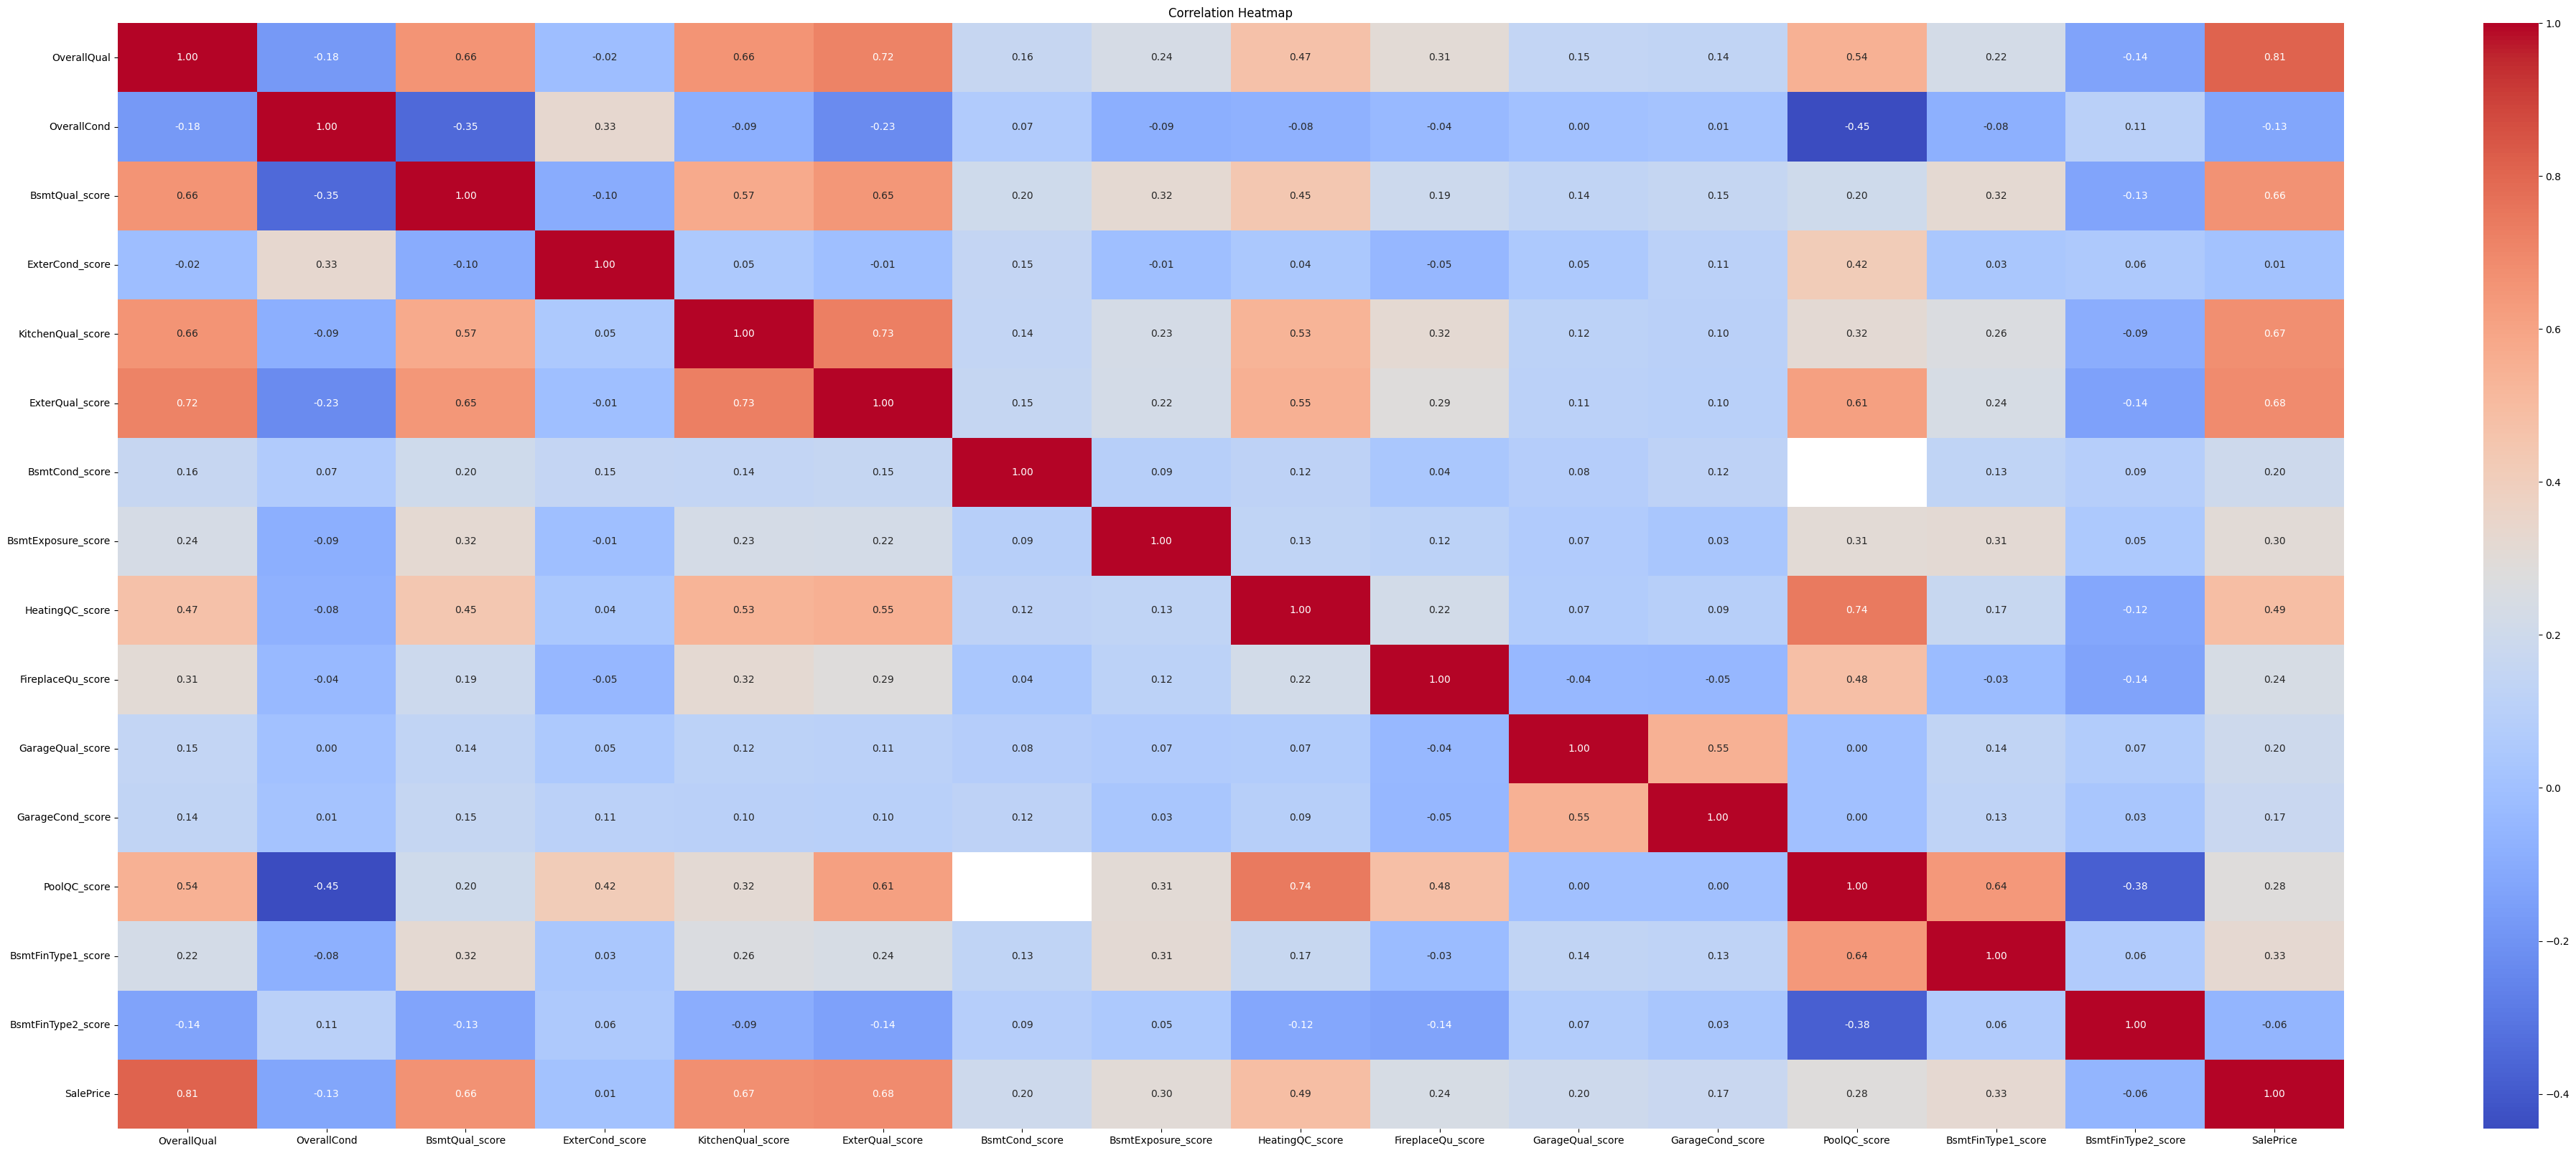

In [ ]:
plt.figure(figsize=(50,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = house_price_train_df[['FullBath','HalfBath','Fireplaces','GarageCars','TotalBsmtSF','YearBuilt','YearRemodAdd','MSSubClass','LotFrontage','LotArea',
                                           'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
                                           'BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                                           'ScreenPorch','MiscVal','MoSold','YrSold','SalePrice']].corr(method='spearman')
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.415906
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
MSSubClass       0.007192
BsmtHalfBath    -0.012189
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePrice, dtype: float64


<Figure size 6000x3000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

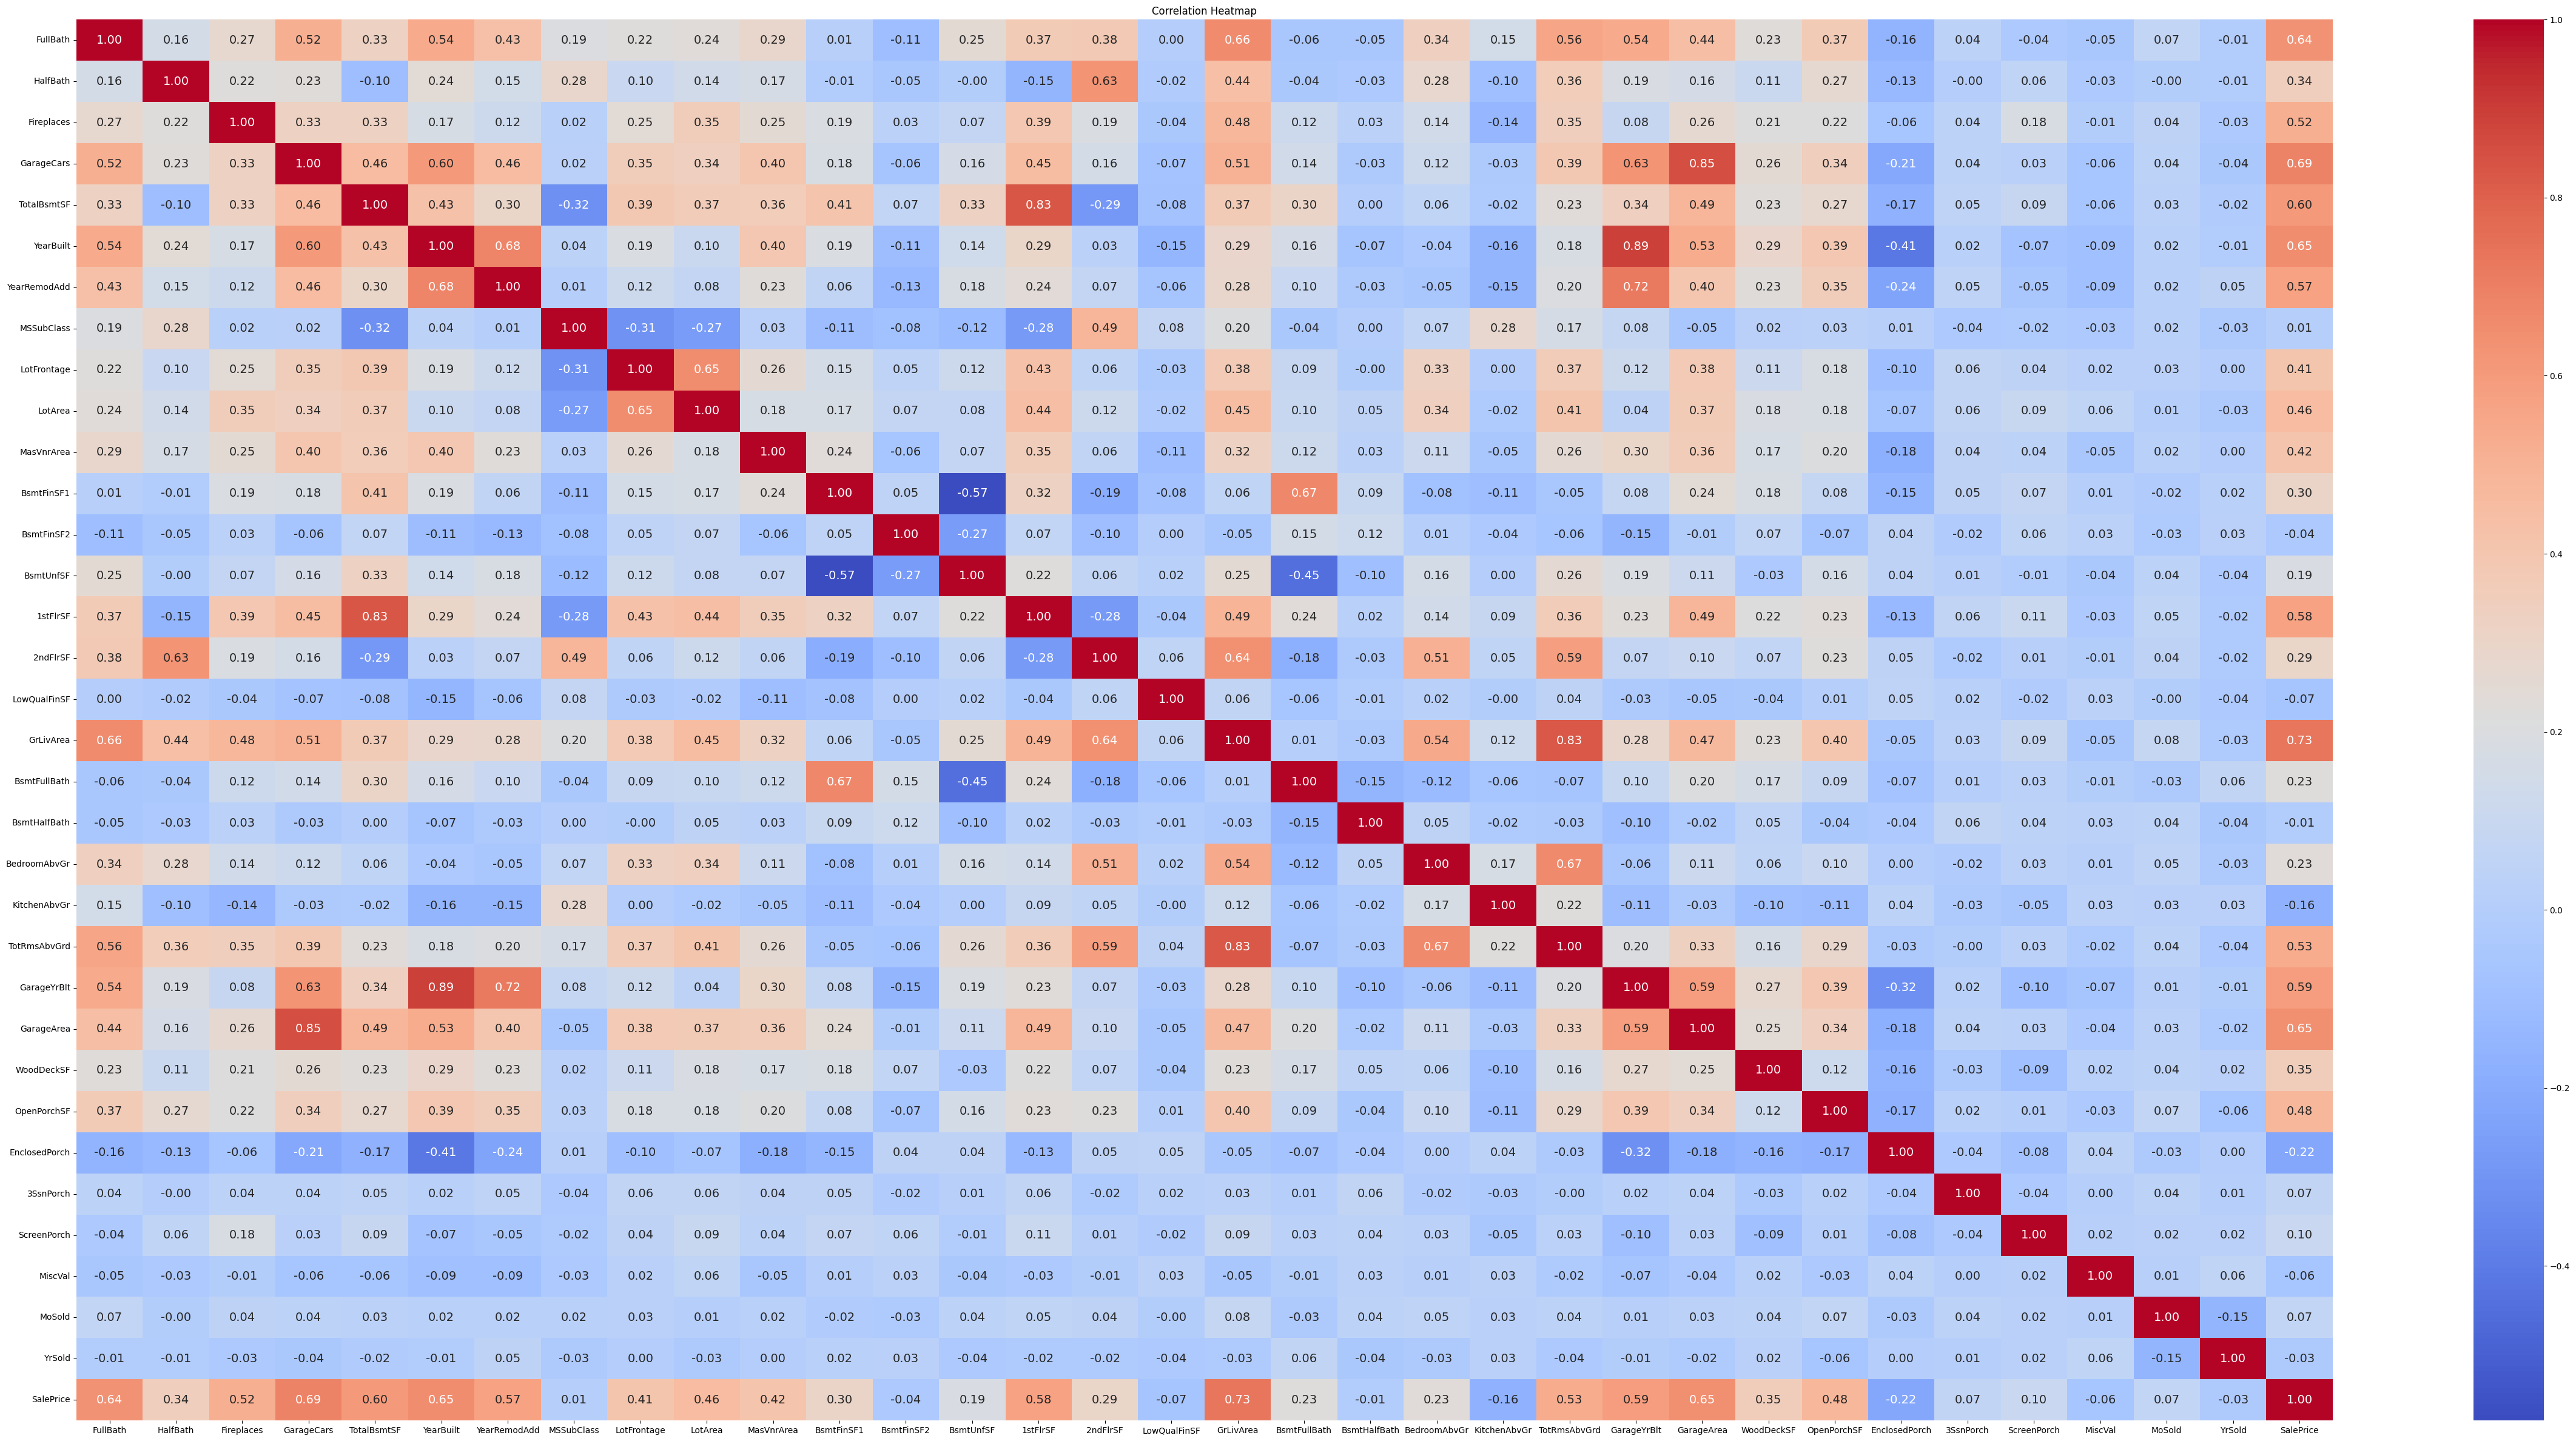

In [ ]:
plt.figure(figsize=(60,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Example encoding for Ames Housing Dataset
nominal_mappings = {
    'MSZoning': {'RL': 1, 'RM': 2, 'FV': 3, 'RH': 4, 'C': 5, 'A': 6, 'I': 7, 'RP': 8},
    'LandContour': {'Lvl': 1, 'Bnk': 2, 'Low': 3, 'HLS': 4},
    'LotConfig': {'Inside': 1, 'FR2': 2, 'FR3': 3, 'Corner': 4, 'CulDSac': 5},
    'Alley': {'Grvl': 1, 'Pave': 2, 'NA': 0},
    'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
    'Utilities': {'AllPub': 1, 'NoSewr': 2, 'NoSeWa': 3, 'ELO': 4},
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'Neighborhood': {'CollgCr': 1, 'Veenker': 2, 'Crawfor': 3, 'NoRidge': 4, 'Mitchel': 5, 'Somerst': 6, 'NWAmes': 7, 'OldTown': 8, 'BrkSide': 9, 'Sawyer': 10, 'NridgHt': 11, 'NAmes': 12, 'SawyerW': 13, 'IDOTRR': 14, 'MeadowV': 15, 'Edwards': 16, 'Timber': 17, 'Gilbert': 18, 'Veenker': 19, 'NPkVill': 20, 'Blmngtn': 21, 'StoneBr': 22, 'ClearCr': 23, 'SWISU': 24, 'Blueste': 25},
    'Condition1': {'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 'RRAn': 6, 'RRNn': 7, 'RRNe': 8},
    'Condition2': {'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 'RRAn': 6, 'RRNn': 7, 'RRNe': 8},
    'BldgType': {'1Fam': 1, '2fmCon': 2, 'Duplex': 3, 'TwnhsE': 4, 'Twnhs': 5},
    'HouseStyle': {'1Story': 1, '1.5Fin': 2, '1.5Unf': 3, '2Story': 4, '2.5Fin': 5, 'SFoyer': 6, 'SLvl': 7, '2.5Unf': 8},
    'RoofStyle': {'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6},
    'RoofMatl': {'CompShg': 1, 'Tar&Grv': 2, 'WdShake': 3, 'WdShngl': 4, 'Metal': 5, 'Membran': 6, 'Roll': 7, 'ClyTile': 8, 'Tar&Grv': 9},
    'Exterior1st': {'VinylSd': 1, 'MetalSd': 2, 'Wd Sdng': 3, 'WdShing': 4, 'HdBoard': 5, 'AsbShng': 6, 'Plywood': 7, 'Stucco': 8, 'BrkComm': 9, 'BrkFace': 10, 'CBlock': 11, 'ImStucc': 12, 'Stone': 13, 'Other': 14, 'PreCast': 15, 'CemntBd': 17, 'AsphShn': 18},
    'Exterior2nd': {'VinylSd': 1, 'MetalSd': 2, 'Wd Sdng': 3, 'WdShing': 4, 'HdBoard': 5, 'AsbShng': 6, 'Plywood': 7, 'Stucco': 8, 'BrkComm': 9, 'BrkFace': 10, 'CBlock': 11, 'ImStucc': 12, 'Stone': 13, 'Other': 14, 'PreCast': 15, 'CemntBd': 17, 'AsphShn': 18},
    'MasVnrType': {'BrkCmn': 1, 'None': 2, 'BrkFace': 3, 'Stone': 4, 'CBlock': 5},
    'Foundation': {'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6},
    'Heating': {'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6},
    'Electrical': {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5},
    'Functional': {'Typ': 1, 'Min1': 2, 'Min2': 3, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal': 8},
    'GarageType': {'2Types': 1, 'Attchd': 2, 'Basment': 3, 'BuiltIn': 4, 'CarPort': 5, 'Detchd': 6, 'NA': 0},
    'GarageFinish': {'Fin': 1, 'RFn': 2, 'Unf': 3, 'NA': 0},
    'PavedDrive': {'Y': 1, 'P': 2, 'N': 3},
    'Street': {'Pave': 1, 'Grvl': 2},
    'Fence': {'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4, 'NA': 0},
    'MiscFeature': {'Elev': 1, 'Gar2': 2, 'Othr': 3, 'Shed': 4, 'TenC': 5, 'NA': 0},
    'SaleType': {'WD': 1, 'CWD': 2, 'VWD': 3,'New': 4, 'COD':5, 'Con':6, 'ConLw':7,	'ConLI':8, 'ConLD':9, 'Oth':10	},
    'SaleCondition': {'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5, 'Partial': 6}
}

for var, mapping in nominal_mappings.items():
    house_price_train_df[var + '_nominal'] = house_price_train_df[var].map(mapping)

<Axes: xlabel='Alley_nominal'>

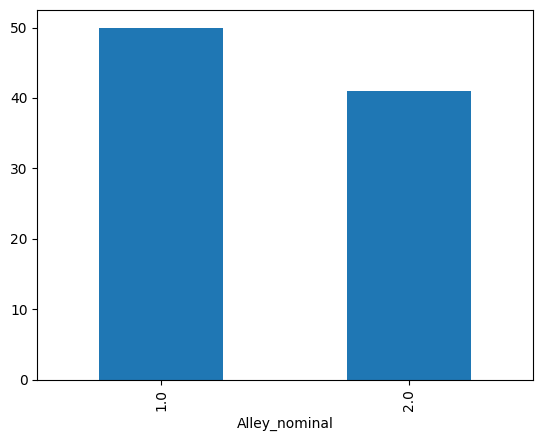

In [ ]:
house_price_train_df['Alley_nominal'].value_counts().plot(kind='bar')

<Axes: xlabel='Foundation_nominal'>

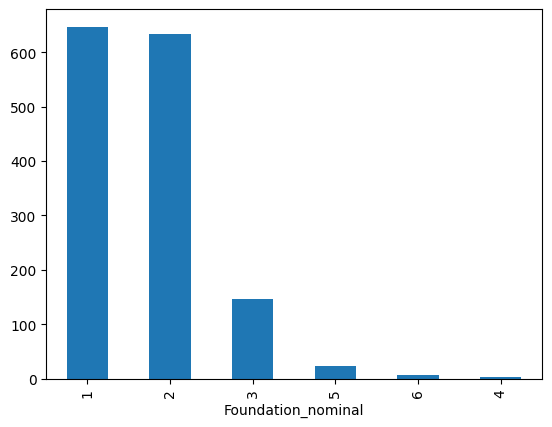

In [ ]:
house_price_train_df['Foundation_nominal'].value_counts().plot(kind='bar')

<Axes: xlabel='GarageFinish_nominal'>

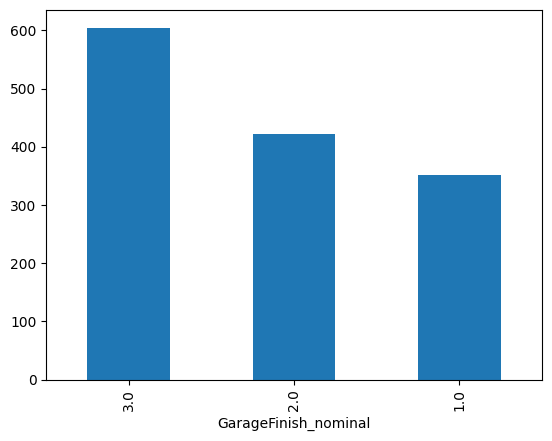

In [ ]:
house_price_train_df['GarageFinish_nominal'].value_counts().plot(kind='bar')

In [ ]:
correlation_matrix = house_price_train_df[['MSZoning_nominal','LotConfig_nominal','Alley_nominal','LotShape_nominal','Utilities_nominal','LandSlope_nominal','Neighborhood_nominal',
                                           'Condition1_nominal','Condition2_nominal','BldgType_nominal','HouseStyle_nominal','RoofStyle_nominal','RoofMatl_nominal', 'Exterior1st_nominal','Exterior2nd_nominal',
                                           'MasVnrType_nominal','Foundation_nominal','Heating_nominal','Electrical_nominal','Functional_nominal','GarageType_nominal','GarageFinish_nominal','PavedDrive_nominal',
                                           'Street_nominal','Fence_nominal','MiscFeature_nominal','SaleCondition_nominal','SaleType_nominal','LandContour_nominal','SalePrice']].corr(method='spearman')
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

SalePrice                1.000000
Alley_nominal            0.601206
MasVnrType_nominal       0.323165
LotShape_nominal         0.321055
SaleType_nominal         0.175015
RoofStyle_nominal        0.149524
MiscFeature_nominal      0.129788
HouseStyle_nominal       0.121666
SaleCondition_nominal    0.121462
LotConfig_nominal        0.104044
RoofMatl_nominal         0.082229
LandSlope_nominal        0.050310
LandContour_nominal      0.026491
Utilities_nominal       -0.016710
Street_nominal          -0.045814
Condition2_nominal      -0.062799
Heating_nominal         -0.121858
BldgType_nominal        -0.129259
Condition1_nominal      -0.130947
Functional_nominal      -0.135489
Neighborhood_nominal    -0.147510
Exterior1st_nominal     -0.222129
MSZoning_nominal        -0.260432
PavedDrive_nominal      -0.280602
Exterior2nd_nominal     -0.287987
Fence_nominal           -0.294945
Electrical_nominal      -0.298652
GarageType_nominal      -0.450583
Foundation_nominal      -0.569054
GarageFinish_n

<Figure size 6000x3000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

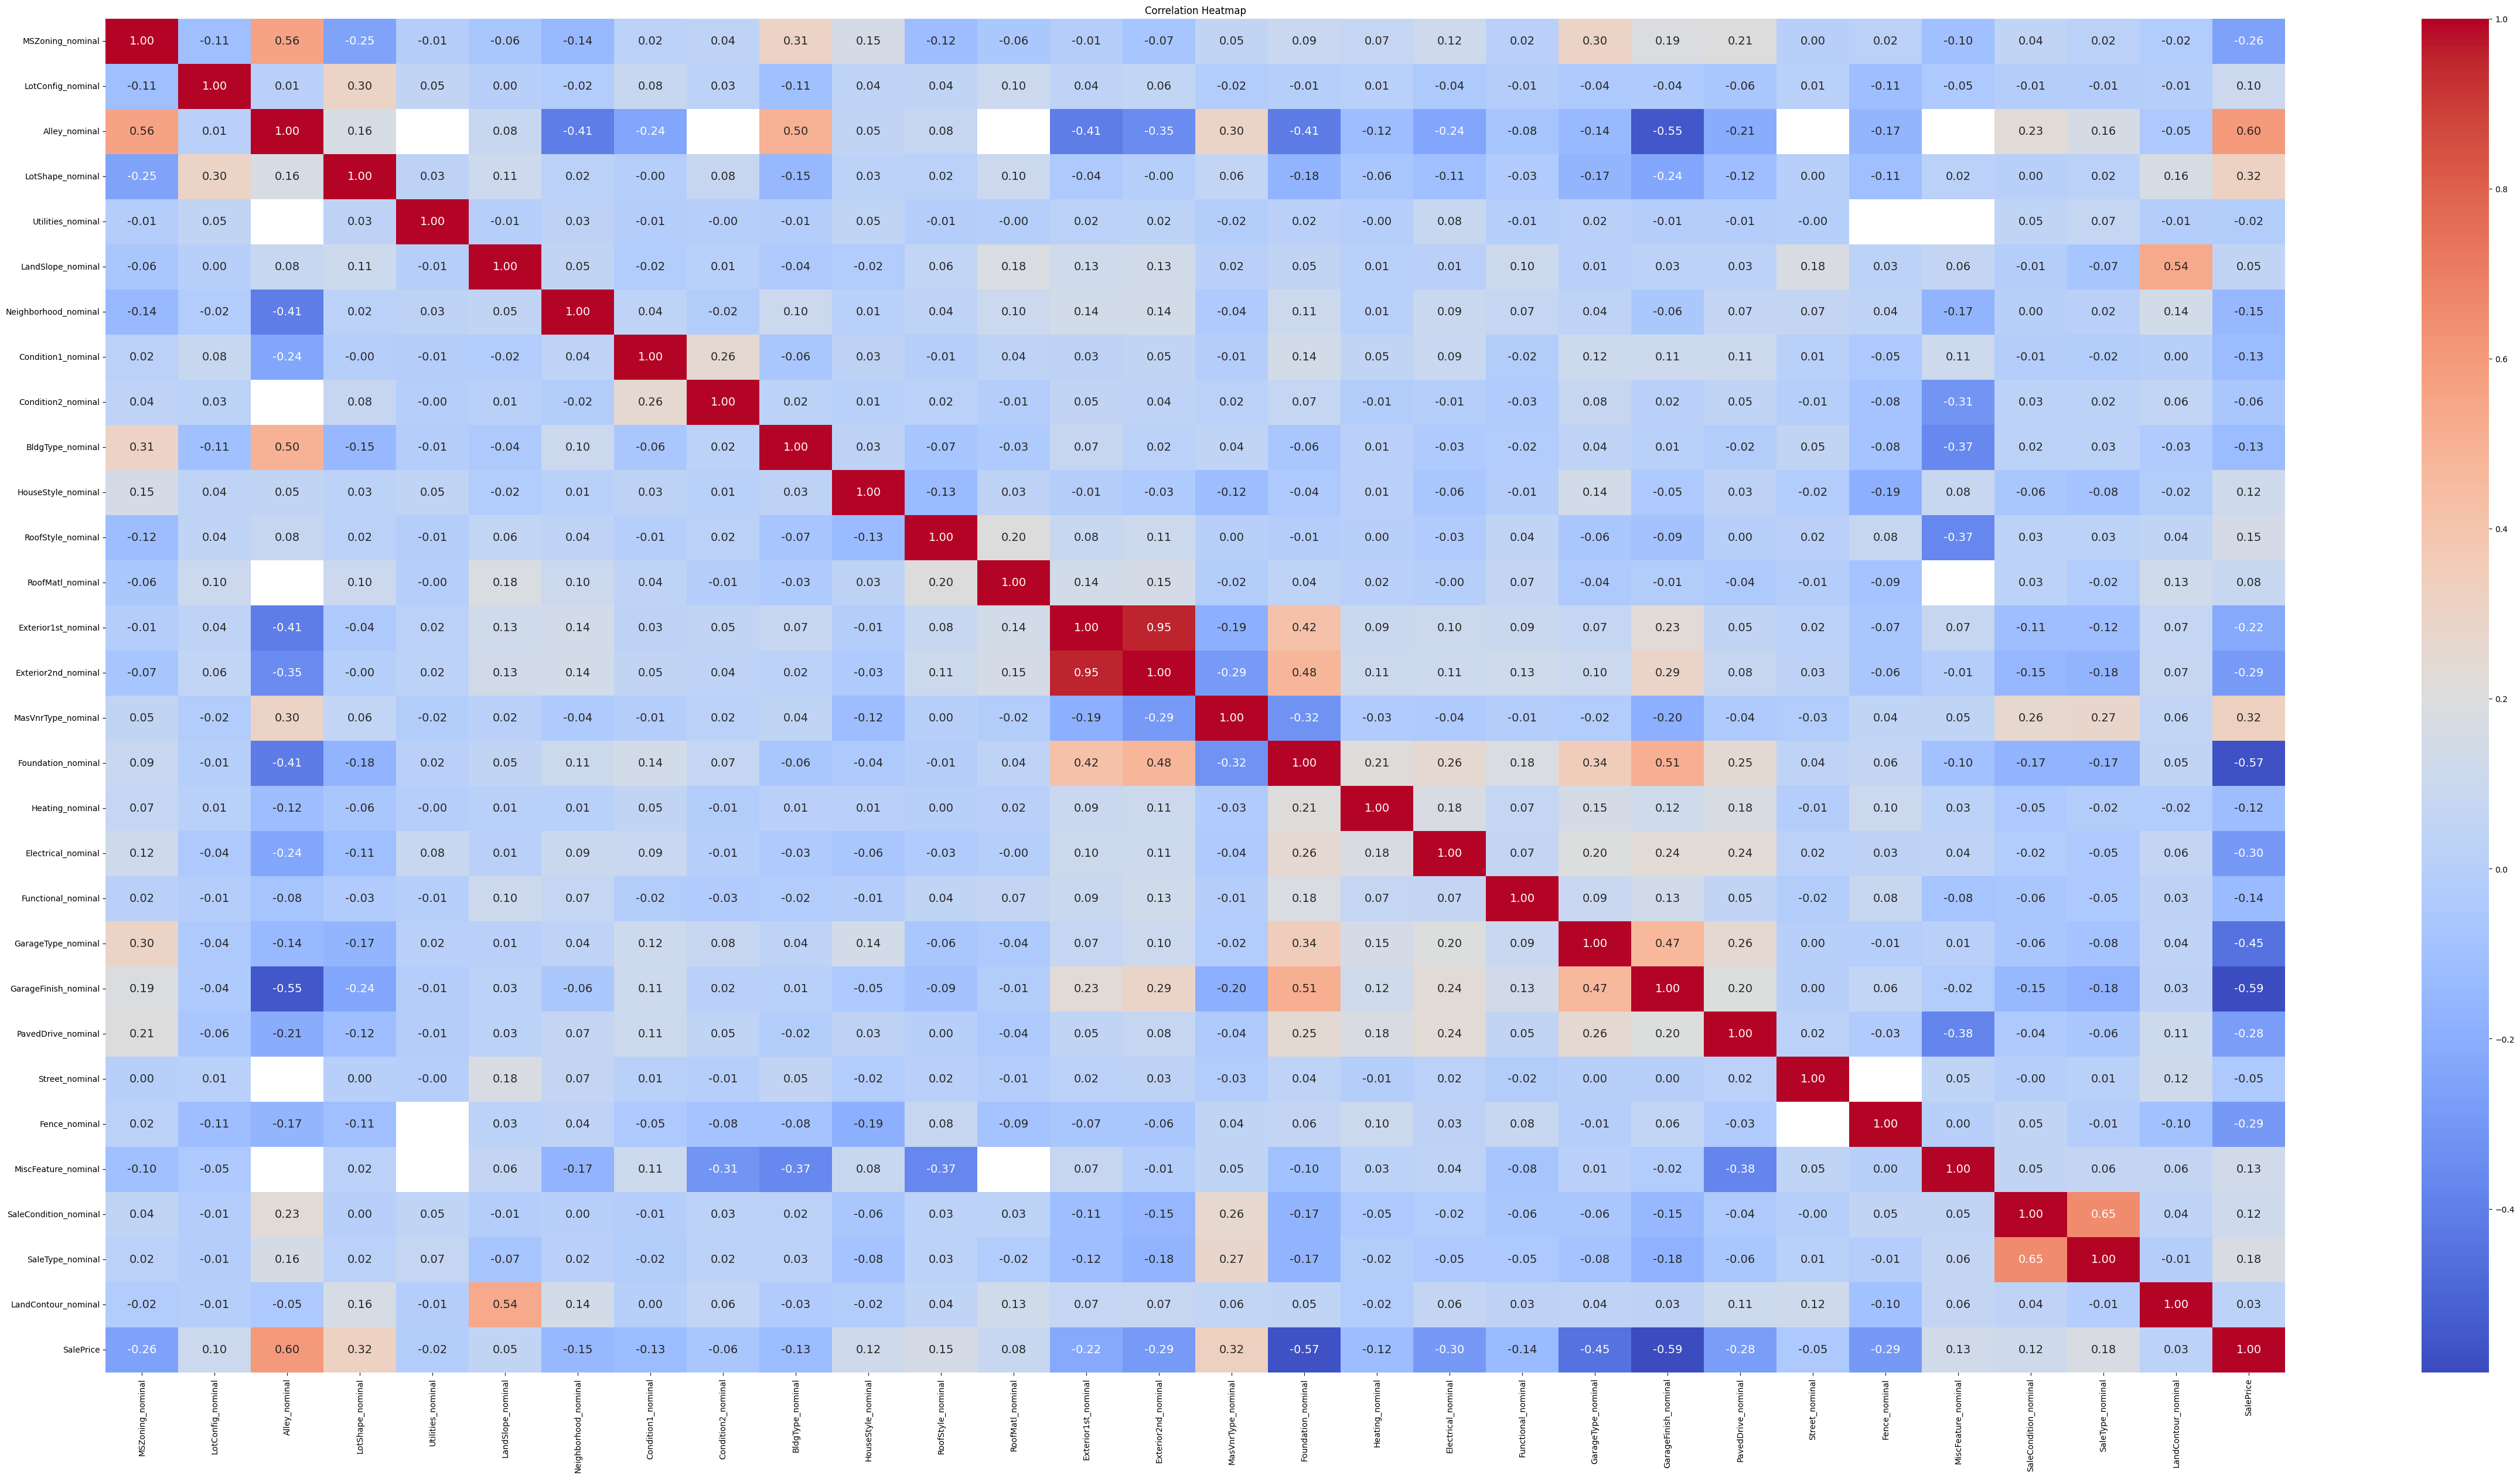

In [ ]:
plt.figure(figsize=(60,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# removing the outliers from the data
def winsorize_series(series, limits=(0.05, 0.95)):
    """
    To remove the outliers in the data.
    """
    lower_limit = series.quantile(limits[0])
    upper_limit = series.quantile(limits[1])
    winsorized_series = series.clip(lower=lower_limit, upper=upper_limit)
    return winsorized_series

house_price_train_df['TotalBsmtSF_winsorized'] = winsorize_series(house_price_train_df['TotalBsmtSF'])
house_price_train_df['GrLivArea_winsorized'] = winsorize_series(house_price_train_df['GrLivArea'])
house_price_train_df['GarageArea_winsorized'] = winsorize_series(house_price_train_df['GarageArea'])

house_price_test_df['TotalBsmtSF_winsorized'] = winsorize_series(house_price_test_df['TotalBsmtSF'])
house_price_test_df['GrLivArea_winsorized'] = winsorize_series(house_price_test_df['GrLivArea'])
house_price_test_df['GarageArea_winsorized'] = winsorize_series(house_price_test_df['GarageArea'])

<Figure size 1000x500 with 0 Axes>

(array([  2.,   2.,  32., 214., 383., 498., 248.,  68.,   9.,   4.]),
 array([5.81413053, 6.09653459, 6.37893865, 6.66134271, 6.94374677,
        7.22615082, 7.50855488, 7.79095894, 8.073363  , 8.35576706,
        8.63817112]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of GrLivArea')

Text(0.5, 0, 'GrLivArea')

<Figure size 1000x500 with 0 Axes>

(array([ 81., 167., 293., 500., 240., 106.,  57.,  10.,   3.,   3.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of GarageArea')

Text(0.5, 0, 'GarageArea')

<Figure size 1000x500 with 0 Axes>

(array([106.,  62., 120., 158., 229., 183., 165., 134., 122., 181.]),
 array([6.25440557, 6.37593043, 6.49745529, 6.61898015, 6.74050501,
        6.86202987, 6.98355473, 7.10507959, 7.22660445, 7.34812931,
        7.46965417]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of TotalBsmtSF')

Text(0.5, 0, 'TotalBsmtSF')

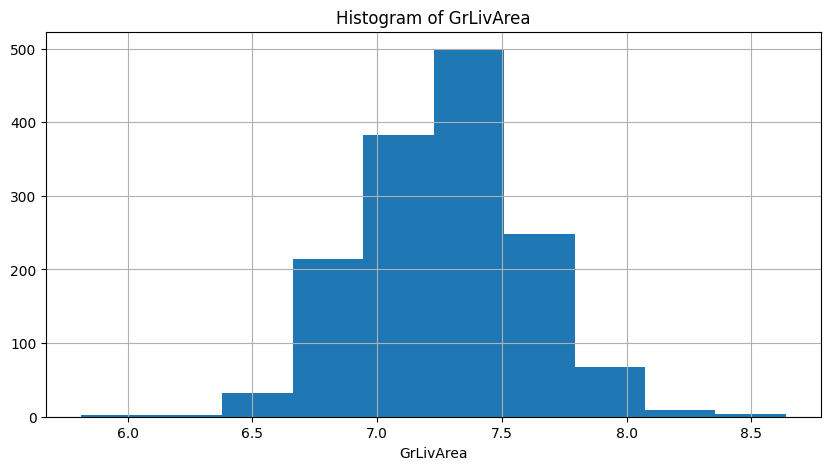

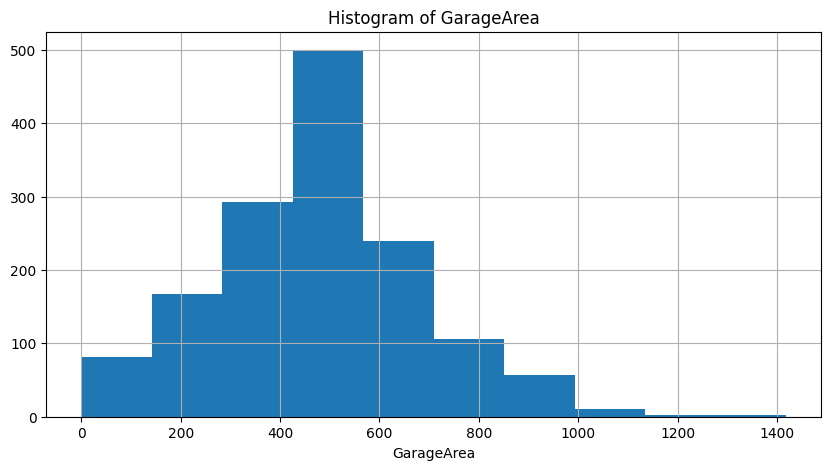

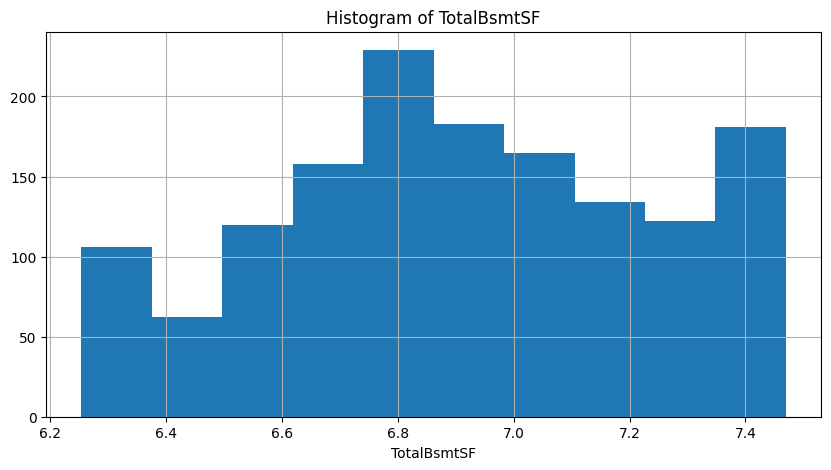

In [ ]:
# log transform of train data
house_price_train_df['GrLivArea_log'] = np.log1p(house_price_train_df['GrLivArea'])

plt.figure(figsize=(10, 5))
plt.hist(x=house_price_train_df['GrLivArea_log'])
plt.title('Histogram of GrLivArea')
plt.xlabel('GrLivArea')
plt.grid(True)

#house_price_train_df['GarageArea_log'] = np.log1p(house_price_train_df['GarageArea_winsorized'])

plt.figure(figsize=(10, 5))
plt.hist(x=house_price_train_df['GarageArea'])
plt.title('Histogram of GarageArea')
plt.xlabel('GarageArea')
plt.grid(True)

house_price_train_df['TotalBsmtSF_log'] = np.log1p(house_price_train_df['TotalBsmtSF_winsorized'])

plt.figure(figsize=(10, 5))
plt.hist(x=house_price_train_df['TotalBsmtSF_log'])
plt.title('Histogram of TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.grid(True)

# log transform of test data
house_price_test_df['GrLivArea_log'] = np.log1p(house_price_test_df['GrLivArea'])
#house_price_test_df['GarageArea_log'] = np.log1p(house_price_test_df['GarageArea_winsorized'])
house_price_test_df['TotalBsmtSF_log'] = np.log1p(house_price_test_df['TotalBsmtSF_winsorized'])

In [ ]:
def label_encode_dataframe(df,ordinal_mappings):
    le = LabelEncoder()
    for column in ordinal_mappings:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print(f"Warning: Column '{column}' not found in the DataFrame.")
    return df

In [ ]:
def one_hot_encode_dataframe(df,nominal_cols):
    df = pd.get_dummies(df, columns=nominal_cols, dummy_na=False, dtype=int)
    return df

In [ ]:
house_price_train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'Street_nominal', 'Fence_nominal', 'MiscFeature_nominal',
       'SaleType_nominal', 'SaleCondition_nominal', 'TotalBsmtSF_winsorized',
       'GrLivArea_winsorized', 'GarageArea_winsorized', 'GrLivArea_log',
       'TotalBsmtSF_log'],
      dtype='object', length=130)

In [ ]:
house_price_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Street_nominal,Fence_nominal,MiscFeature_nominal,SaleType_nominal,SaleCondition_nominal,TotalBsmtSF_winsorized,GrLivArea_winsorized,GarageArea_winsorized,GrLivArea_log,TotalBsmtSF_log
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1,NaN,NaN,1,1,856.0,1710.0,548.0,7.444833,6.753438
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1,NaN,NaN,1,1,1262.0,1262.0,460.0,7.141245,7.141245
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1,NaN,NaN,1,1,920.0,1786.0,608.0,7.488294,6.825460
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,NaN,NaN,1,2,756.0,1717.0,642.0,7.448916,6.629363
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,NaN,NaN,1,1,1145.0,2198.0,836.0,7.695758,7.044033


In [ ]:
# house_price_train_df = pd.read_csv("/content/drive/MyDrive/UNT/testproject/train.csv")

ordinal_cols = ['ExterQual', 'KitchenQual','BsmtQual', 'HeatingQC']

nominal_cols = ['Alley', 'Foundation', 'GarageFinish']

house_price_train_df = label_encode_dataframe(house_price_train_df,ordinal_cols)
house_price_train_df = one_hot_encode_dataframe(house_price_train_df, nominal_cols)

In [ ]:
features = ['TotalBsmtSF_log', 'GrLivArea_log', 'GarageArea', 'OverallQual',
            'ExterQual', 'BsmtQual', 'KitchenQual', 'HeatingQC', 'GarageCars',
            'YearBuilt', 'FullBath', 'GarageYrBlt', 'YearRemodAdd', 'TotRmsAbvGrd',
            'Fireplaces', 'Alley_Pave', 'Alley_Grvl','Foundation_BrkTil', 'Foundation_CBlock',
            'Foundation_PConc',	'Foundation_Slab',	'Foundation_Stone',	'Foundation_Wood',
            'GarageFinish_Fin',	'GarageFinish_RFn',	'GarageFinish_Unf']

# Load your dataset
x_train = house_price_train_df[features]
y_train = house_price_train_df['SalePrice_log']

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='median')

# Fit the imputer on your training data and transform it
X_const = imputer.fit_transform(x_train)

X_test = x_train = house_price_train_df[features]
X_test_const = imputer.transform(X_test)

# Now, split the data into training and testing sets after defining X_const and y_train
X_train, X_test_split, y_train, y_test = train_test_split(X_const, y_train, test_size=0.1, random_state=42)

In [ ]:
# Create the Lenear model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# Make predictions on the test set (using the split test set)
lm_predictions = lm_model.predict(X_test_split)

# Evaluate the model
lm_r2 = r2_score(y_test, lm_predictions)
print(f"R-squared on test set: {lm_r2}")

# Calculate the Mean Squared Error (MSE)
lm_mse = mean_squared_error(y_test, lm_predictions)
print(f"Mean Squared Error on test set: {lm_mse}")

# Evaluate the model
lm_rmse = np.sqrt(mean_squared_error(y_test, lm_predictions))
print(f"RMSE: {lm_rmse}")

LinearRegression()

R-squared on test set: 0.8962351944791291
Mean Squared Error on test set: 0.020334745436172853
RMSE: 0.14259994893467828


In [ ]:
# Create the XGBoost model
xg_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                            max_depth = 5, alpha = 10, n_estimators = 10)

# Train the model
xg_model.fit(X_train, y_train)

# Make predictions on the test set
xg_predictions = xg_model.predict(X_test_split)

# Evaluate the model
xg_r2 = r2_score(y_test, xg_predictions)
print(f"XGBRegressor R-squared on test set: {xg_r2}")

# Calculate the Mean Squared Error (MSE)
xg_mse = mean_squared_error(y_test, xg_predictions)
print(f"Mean Squared Error on test set: {xg_mse}")

xg_rmse = np.sqrt(mean_squared_error(y_test, xg_predictions))
print(f"RMSE: {xg_rmse}")

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

XGBRegressor R-squared on test set: 0.5550114519218502
Mean Squared Error on test set: 0.08720421921246999
RMSE: 0.29530360514641535


In [ ]:
# Create and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_split)

# Evaluate the model
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest R-squared on test set: {rf_r2}")

rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Mean Squared Error on test set: {rf_mse}")

rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest RMSE: {rf_rmse}")

RandomForestRegressor(random_state=42)

Random Forest R-squared on test set: 0.8926688603952726
Random Forest Mean Squared Error on test set: 0.0210336384314571
Random Forest RMSE: 0.1450297846356296


In [ ]:
# Create and train the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test_split)

# Evaluate the model
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Gradient Boosting R-squared on test set: {gb_r2}")

gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting Mean Squared Error on test set: {gb_mse}")

gb_rmse = np.sqrt(gb_mse)
print(f"Gradient Boosting RMSE: {gb_rmse}")


GradientBoostingRegressor(random_state=42)

Gradient Boosting R-squared on test set: 0.9001346232173374
Gradient Boosting Mean Squared Error on test set: 0.019570576021119952
Gradient Boosting RMSE: 0.13989487489225597


<Figure size 800x600 with 0 Axes>

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
         2.,  1.,  3.,  5.,  4., 12., 17., 33., 17., 15., 14.,  9.,  6.,
         1.,  0.,  2.,  1.]),
 array([-0.81227709, -0.77340557, -0.73453404, -0.69566252, -0.656791  ,
        -0.61791947, -0.57904795, -0.54017643, -0.50130491, -0.46243338,
        -0.42356186, -0.38469034, -0.34581882, -0.30694729, -0.26807577,
        -0.22920425, -0.19033273, -0.1514612 , -0.11258968, -0.07371816,
        -0.03484663,  0.00402489,  0.04289641,  0.08176793,  0.12063946,
         0.15951098,  0.1983825 ,  0.23725402,  0.27612555,  0.31499707,
         0.35386859]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distribution of Residuals')

Text(0.5, 0, 'Residuals')

Text(0, 0.5, 'Frequency')

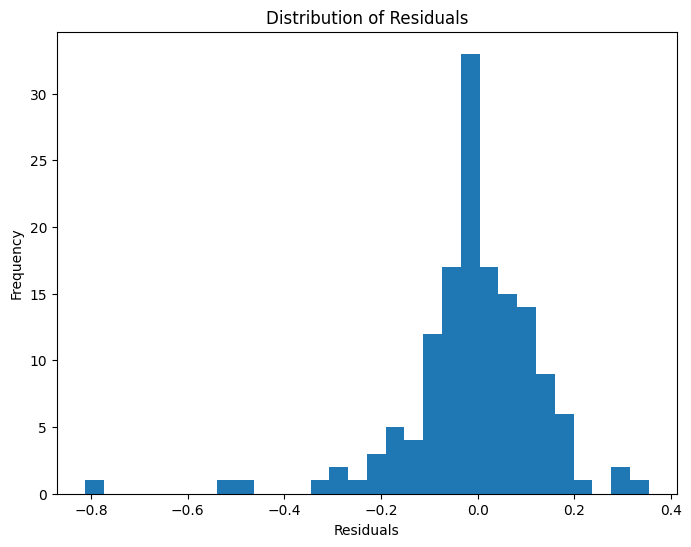

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Residuals vs. Predicted Values')

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

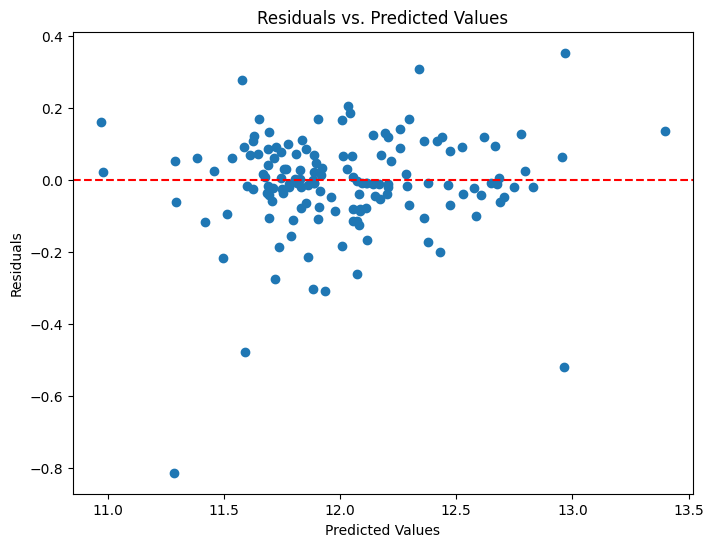

In [ ]:
# Calculate residuals
residuals = y_test - gb_predictions

# Analyze residuals (example: plot a histogram)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Analyze residuals (example: plot residuals vs. predicted values)
plt.figure(figsize=(8, 6))
plt.scatter(gb_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

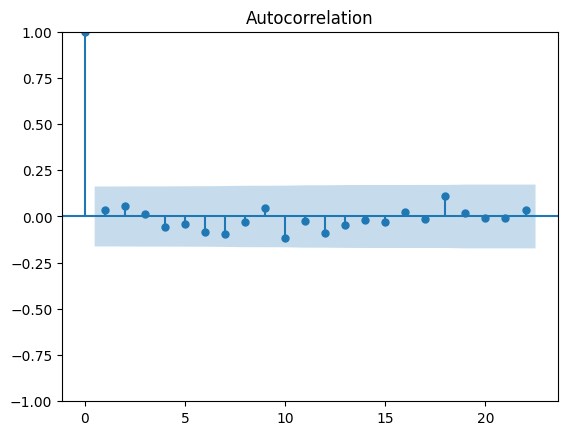

Text(0.5, 1.0, 'ACF of Residuals')

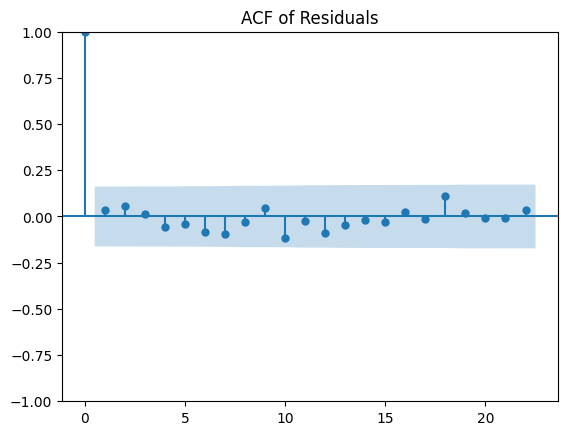

In [ ]:
#plot ACF of residual
# Calculate residuals (assuming 'rf_predictions' and 'y_test' are defined)
residuals = y_test - gb_predictions

# Plot ACF of residuals
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.show()

In [ ]:
# ljung box test of residual
# Handle missing values (NaN) in residuals before applying the Ljung-Box test
residuals = residuals.dropna()  # Remove NaN values from residuals

lb_test = acorr_ljungbox(residuals, lags=20, return_df=True)  # Adjust the number of lags as needed

# Print the results
print(lb_test)

# Interpret the p-values (example)
alpha = 0.05
for lag, p_value in zip(lb_test.index, lb_test['lb_pvalue']):  # Use lb_test.index to access the 'lag' index
  print(f"Lag {lag}: p-value = {p_value}")
  if p_value < alpha:
    print(f"  Reject the null hypothesis (autocorrelation at lag {lag})")
  else:
    print(f"  Fail to reject the null hypothesis (no autocorrelation at lag {lag})")

      lb_stat  lb_pvalue
1    0.209186   0.647406
2    0.680084   0.711741
3    0.711507   0.870494
4    1.174606   0.882262
5    1.398287   0.924501
6    2.448102   0.874230
7    3.867527   0.794903
8    4.021537   0.855175
9    4.342026   0.887495
10   6.441472   0.776910
11   6.519433   0.836560
12   7.761241   0.803499
13   8.110401   0.836334
14   8.161938   0.880720
15   8.291409   0.911569
16   8.375102   0.936907
17   8.401006   0.957204
18  10.419893   0.917336
19  10.487472   0.939879
20  10.506183   0.958038
Lag 1: p-value = 0.6474063166750057
  Fail to reject the null hypothesis (no autocorrelation at lag 1)
Lag 2: p-value = 0.7117405644623448
  Fail to reject the null hypothesis (no autocorrelation at lag 2)
Lag 3: p-value = 0.8704940776564966
  Fail to reject the null hypothesis (no autocorrelation at lag 3)
Lag 4: p-value = 0.8822615743654694
  Fail to reject the null hypothesis (no autocorrelation at lag 4)
Lag 5: p-value = 0.9245005602050871
  Fail to reject the null h

In [ ]:
house_price_test_df = label_encode_dataframe(house_price_test_df,ordinal_cols)
house_price_test_df = one_hot_encode_dataframe(house_price_test_df, nominal_cols)

In [ ]:
x_test = house_price_test_df[features]

# Use the same imputer fitted on the training data to transform the test data
X_test_const = imputer.transform(x_test)

# Make predictions using the trained RandomForestRegressor model
rf_test_predictions = gb_model.predict(X_test_const)

# Print or save the predictions
rf_test_predictions

predicted_saleprice = np.expm1(rf_test_predictions)
predicted_saleprice
#save predictions to a CSV file
prediction_df = pd.DataFrame({'Id': house_price_test_df['Id'],'SalePrice': predicted_saleprice})

array([11.72949496, 11.81579001, 12.05690211, ..., 11.96218374,
       11.72085529, 12.38108736])

array([124179.93808766, 135372.1077139 , 172283.43926364, ...,
       156713.93548183, 123111.67681925, 238251.74959012])

<Axes: >

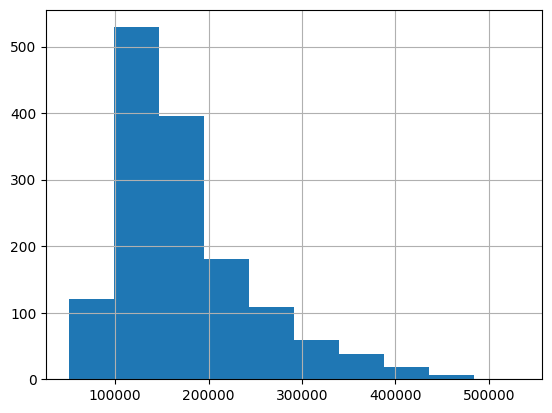

In [ ]:
prediction_df['SalePrice'].hist()

In [ ]:
prediction_df.to_csv('/content/drive/MyDrive/UNT/testproject/prediction_df.csv',index=False)

In [ ]:
sample_df = pd.read_csv("/content/drive/MyDrive/UNT/testproject/sample_submission.csv")

In [ ]:
# Calculate the accuracy percentage with the sample submission
correct_predictions = np.sum(np.isclose(prediction_df['SalePrice'], sample_df['SalePrice'], atol=1000))
total_predictions = len(prediction_df)
accuracy_percentage = (correct_predictions / total_predictions) * 100
print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")

Accuracy Percentage: 1.30%


In [ ]:
#Insights and Actionable Steps (Example)

#Based on the feature importance analysis:

#1.  OverallQual, ExterQual, BsmtQual, KitchenQual, and GarageCars are consistently significant predictors of SalePrice. Focus on improving these aspects of properties to increase their value.

#2. YearBuilt and YearRemodAdd have considerable influence.  Newer or recently remodeled homes tend to command higher prices.

#3.  Consider the specific nominal features that show importance,  (e.g., Alley_Pave, Foundation_PConc) to understand how different categories impact property prices.
#    Use these insights for targeted marketing, property development or when advising clients.

#4. TotalBsmtSF_log, GrLivArea_log, GarageArea_log, TotRmsAbvGrd, and Fireplaces  indicate the importance of size and amenities.

#5.  Examine the residuals:
#   -A non-random pattern in the residuals might suggest that the model could be improved with additional variables, transformations, or outlier treatments.

